### Homework 1 by Jian Wang  
#### Question 1

In [1]:
import pymc as pm
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

In [2]:
# prepare the data
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)

(a) Assuming the change of behavior happened at $\tau$ =40, model the prior distributions with different $\lambda$

In [27]:
# Build up the priors. Use tao being 40 as our assumption.
# We are creating the random number generators. 
alpha_1 = 40.0 / sum(count_data[:40])
alpha_2 = (1.0*n_count_data-40) / sum(count_data[40:])

lambda_1 = pm.Exponential("lambda_1", alpha_1)
lambda_2 = pm.Exponential("lambda_2", alpha_2)

tau = 40

In [28]:
# Create the random variable for generating the counts data.
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

In [29]:
# Doing the model building.

observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2])

In [30]:
# Doing the simulation process, ie MCMC
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 2.0 sec

In [31]:
# Collect all the simulation result w.r.t lambda1, lambda2 and tau.
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
# There is no need for the tau, since it is just a value, 40.

In [32]:
# Draw the simulation result, ie the distributions. Using a function.

def drawPosteriors(lambda_1_samples,lambda_2_samples,tau_ls ):
    figsize(12.5, 10)
    # histogram of the samples:

    ax = plt.subplot(311)
    ax.set_autoscaley_on(False)

    plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
             label="posterior of $\lambda_1$", color="#A60628", density=True)
    plt.legend(loc="upper left")
    plt.title(r"""Posterior distributions of the variables
        $\lambda_1,\;\lambda_2,\;\tau$""")
    plt.xlim([15, 35])
    plt.xlabel("$\lambda_1$ value")

    ax = plt.subplot(312)
    ax.set_autoscaley_on(False)
    plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
             label="posterior of $\lambda_2$", color="#7A68A6", density=True)
    plt.legend(loc="upper left")
    plt.xlim([15, 35])
    plt.xlabel("$\lambda_2$ value")


    plt.subplot(313)
    w = 1.0 / tau_ls.shape[0] * np.ones_like(tau_ls)
    plt.hist(tau_ls, bins=n_count_data, alpha=1,
             label=r"posterior of $\tau$",
             color="#467821", weights=w, rwidth=2.)
    plt.xticks(np.arange(n_count_data))

    plt.legend(loc="upper left")
    plt.ylim([0, .75])
    plt.xlim([0, 70])
    plt.xlabel(r"$\tau$ (in days)")
    plt.ylabel("probability")

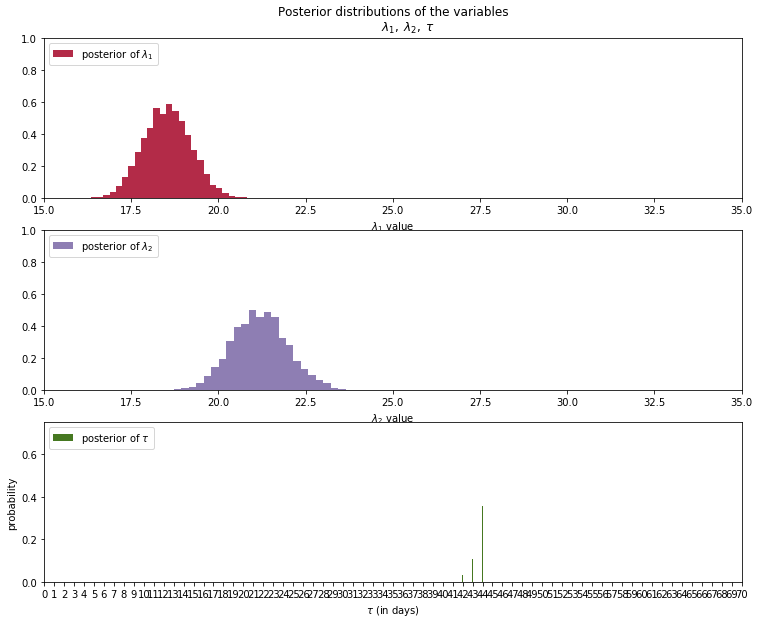

In [33]:
drawPosteriors(lambda_1_samples,lambda_2_samples,tau_ls)

The assumption of $\tau$ being 40 does not seem to be a good choice, because that the two distributions are overlapping with each other. This means that the mean of text message received does not seem to differ, given the probability for such situation being non-negative. But the distribution of $\tau$ is still the same as that in the unrestricted condition.

(b) Since we change our assumption of $\tau$ to be on day 25. Then our choice of $\lambda_1$ and $\lambda_2$ also changed by the different initialization of hyperparameters $\alpha_1$ and $\alpha_2$.  
So the process is exactly the same as above, which means all we need to do is to rerun the codes with different "priors".

In [34]:
# Build up the priors. Use tao being 40 as our assumption.
# We are creating the random number generators. 
alpha_1 = 25.0 / sum(count_data[:25])
alpha_2 = (1.0*n_count_data-25) / sum(count_data[25:])

lambda_1 = pm.Exponential("lambda_1", alpha_1)
lambda_2 = pm.Exponential("lambda_2", alpha_2)

tau = 25

In [35]:
# Create the random variable for generating the counts data.
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

In [36]:
# Doing the model building.
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2])

In [37]:
# Doing the simulation process, ie MCMC
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 2.0 sec

In [38]:
# Collect all the simulation result w.r.t lambda1, lambda2 and tau.
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
# There is no need for the tau, since it is just a value, 40.

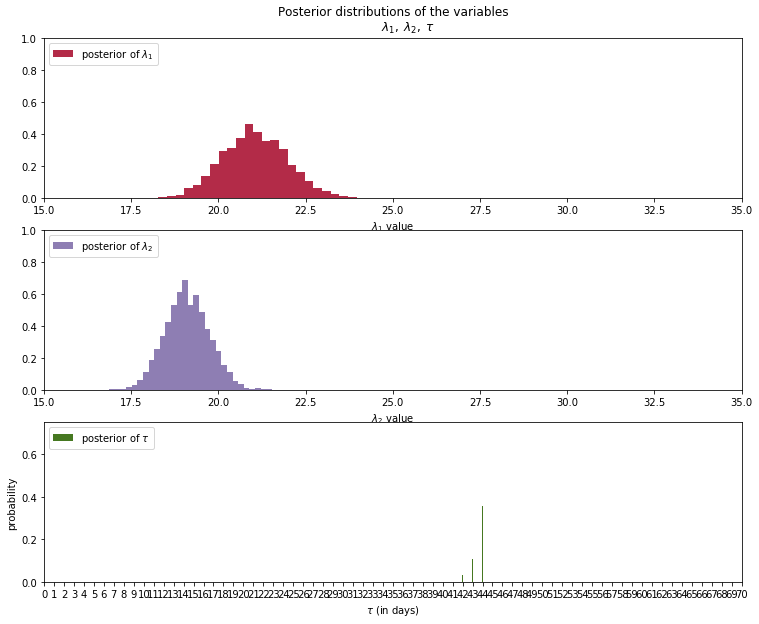

In [39]:
drawPosteriors(lambda_1_samples,lambda_2_samples,tau_ls)

In the plots above, we see a major portion of overlap for $\lambda_1$ and $\lambda_2$. This entails that the mean of the counts of text messages we received or sent in the two periods are not very differnt. Since the $\lambda$ in a Possion distribution means the mean value that its random variable can take. Thus we can't see that the change of prior for $\tau=25$ is a good assumption to discover the change of behavior.  
Also the spread of the posterior distribution of $\lambda$ seems to shrink, which will make the overlapping more likely to happen. Therefore we can't tell if the change of behavior happens.

(C) To change the distribution of $\tau$ to be a Uniform(0,40).  

In [15]:
# Build up the priors. Use tao being 40 as our assumption.
# We are creating the random number generators. 
alpha_3 = 1.0 / count_data.mean()

lambda_1 = pm.Exponential("lambda_1", alpha_3)
lambda_2 = pm.Exponential("lambda_2", alpha_3)

tau = pm.DiscreteUniform(name="tau",lower=1,upper=40)

In [16]:
# Create the random variable for generating the counts data.
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

In [17]:
# Doing the model building.
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

In [18]:
# Doing the simulation process, ie MCMC
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 3.3 sec

In [19]:
# Collect all the simulation result w.r.t lambda1, lambda2 and tau.
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
# There is no need for the tau, since it is just a value, 40.
tau_samples = mcmc.trace('tau')[:]

/Users/jw/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jw/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'probability')

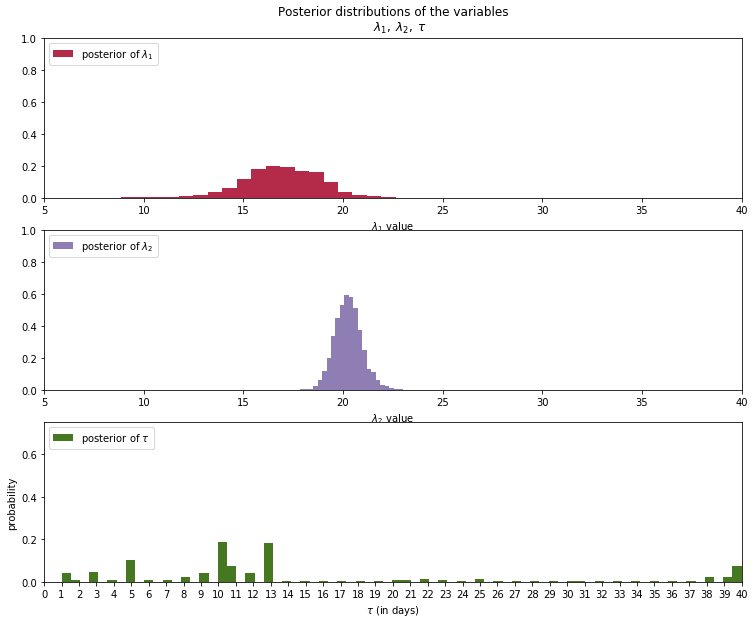

In [20]:
figsize(12.5, 10)
# histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([5, 40])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([5, 40])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([0, 40])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability")

In the changing of prior distribution of $\tau$ we can see that the good values for $\tau$ is around 10, 13 and 5. This is quite a different result comparing with the unrestricted result for $\tau$. And also for the distribution of $\lambda 1$&$ \lambda 2$, we see that the distributions have overlap and it means that we are not so sure about the change of behaivor given condition of $\tau$ being uniformly distributed from 0 to 40.

Question 2:  
(a)Monty Hall problem. Here is our simulation procedures and the random variables needed.  
Random Variables:
    1. The r.v. for assign prizes.
    2. The r.v. for make first selection.
    3. The r.v. for winning.
The procedures:
    1. Pick a door holding car by chance, ie p=1/3
    2. Make a selection on the door, ie p=1/3.
    3. Host open a door, two cases.
    4. Collect the result in the unpicked and closed door.
    5. repeat above process for 4000 times.  
The result:  
By the ploting of simulation result, we can see that the ratio of win over loss after switching the door is 2/1.  This means that the probability of winning by switiching door is 0.6667.

In [21]:
import random

In [22]:
def simulateMontyHall(simulation_num):

    # get the assignment of prize.
    # The data structure to hold the door value is a string, first letter is the door,
    # second letter is the prize, third letter is the open or not open.

    door_ls = []
    result_ls = []
    count = 0
    for i in range(simulation_num):
        door = ["A", "B", "C"]
        # Generate a random number, and mode it with 3 to mark the door with car.
        prize_num = random.randint(1, 100) % 3
        door = [ door[i]+"C" if i == prize_num else door[i]+"G" for i in range(len(door))]
        # Generate another random number to mark the door player choose.
        door = [door[i]+"U" if i == 0 else door[i]+"N" for i in range(len(door))]
        # To decide which door the host will reveal.
        # Two cases: for the user having the car, reveal a random one from the other two.
        # For the user don't have the car, select the number not a prize and not a user.


        if door[0][1] == "C":
            to_open = random.randint(1,100) % 2
            door = [ door[i]+"O" if i != 0 and i == to_open+1 else door[i]+"c" for i in range(len(door))]
            #print(door)
        else:
            # now the number will be either 1 or 2.
            to_open = prize_num %2 + 1
            door = [ door[i]+"O" if i == to_open else door[i]+"c" for i in range(len(door)) ]
            #print(door)
        for i in door[1:]:
            if i[-1] == "c":
                #print(i)
                # make the switch and decide if the switch win.
                count += int(i[1]=="C")
                result_ls.append(i)
                door_ls.append(door)
                break
            
    return count


In [23]:
# draw the simulation result.
no_count_ls = []
count_ls = []
for sim_num in range(1,100000,1000):
    count = simulateMontyHall(sim_num)
    no_count = sim_num-count
    count_ls.append(count)
    no_count_ls.append(no_count)


In [24]:
index = list(range(100))

Text(0,0.5,'The counts')

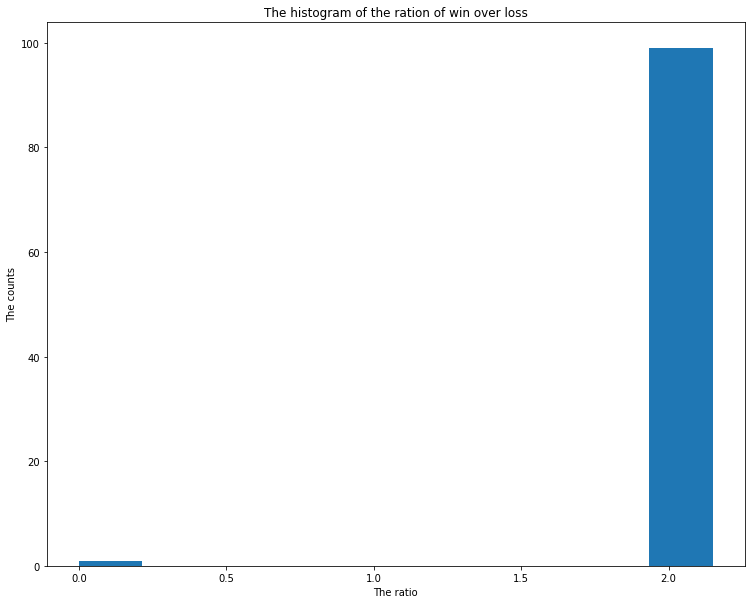

In [25]:
ratio = [count_ls[i]/no_count_ls[i] for i in range(len(count_ls))]
a,b,c = plt.hist(ratio)
plt.title("The histogram of the ration of win over loss")
plt.xlabel("The ratio")
plt.ylabel("The counts")

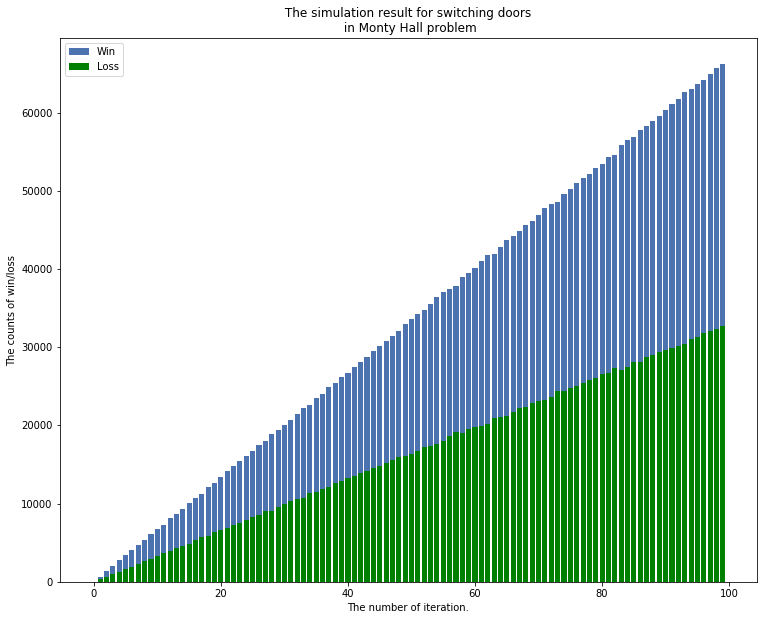

In [26]:
plt.style.use('seaborn-deep')
plt.bar(index,count_ls)
plt.bar(index,no_count_ls,color='green')
plt.xlabel("The number of iteration.")
plt.ylabel("The counts of win/loss")
plt.title(" The simulation result for switching doors \n in Monty Hall problem")
plt.legend(loc="best",labels=["Win","Loss"])
plt.show()

### (b) Solving Monty Hall Analytically:    
Set up the problem:  
    We define the random variable $X$ as the player first choice of door. It is clear that $S_{X}={1,2,3}$  
  
Then we define the events:  
        A: Switch a door  
        B: Winning the car  
        C: Player initially choose the door with the car.  
  
Describe the output:  
We want the $P\{win|switch\space door\}=P\{B|A\}$  ($*$) . 
  
Invesitgate the event's nature:  
$A = (A\cap{C})\cup(A\cap{\bar{C}})$, where $\bar{C}$ is the complement set of C. 
  
Then we can modify the ($*$) expression:  
$P\{B|A\}=P\{B|(A\cap{C})\cup(A\cap{\bar{C}})\} = P\{B|A\cap{C}\}+P\{B|A\cap{\bar{C}}\}$  
  
Recall the condition propability formula:  
$P\{B|A\} = \frac{P\{B\cap{A}\}}{P\{A\}}$  
  
Now let's compute basic probability:  
It is common to know that choosing randomly of a three door, with only one prize behind a door will lead us to:  
$P\{C\}=\frac{1}{3}$ and $P\{\bar{C}\}=\frac{2}{3}$  
  
When we assume that the player first choose a door with prize.  
After the host's action he/she switches to another door, $\text{THIS WILL LEADS TO THE NON-CAR DOOR}$.  
Also notice that we are investigating the strategy of switching door, therefore $P\{A|C\}=1$  
Thus the chance of winning is zero by the previous setting.  

$P\{B|A\cap{C}\}=\frac{P\{B\cap{A}\cap{C}\}}{P\{A\cap{C}\}} = \frac{P\{B\cap{A}\cap{C}\}*P\{C\}}{P\{A|C\}} = {0*\frac{1}{3}\over{1}}=0$  
  
We started with player choosing a door with goat ie no prize.  
After the host revealing, which means in this situation the host must choose the door with another goat.  
Now the player change of door will lead to the door with prize behind it.  
Thus we have a chance of winning by switching.
Similarly, we need to switch everytime, so $P\{A|\bar{C}\}=1$  
$P\{B|A\cap{\bar{C}}\}=\frac{P\{B\cap{A}\cap{\bar{C}}\}}{P\{A\cap{\bar{C}}\}} = \frac{P\{B\cap{A}\cap{\bar{C}}\}*P\{\bar{C}\}}{P\{A|\bar{C}\}} = {1*\frac{2}{3}\over{1}} = {2\over{3}}$  
  
The final result will be:  
$P\{B|A\} = P\{B|A\cap{C}\}+P\{B|A\cap{\bar{C}}\} = 0+{2\over{3}}={2\over{3}}$  

Summary:  
Switching door seems to increase our chance of winning given a sufficient large of runs.

Question 3:  
(a):
To simulate the birthday that everyone takes we use the following assumption:
    1. Every people has a equal chance of being born in anyday of the year.
    2. All people in the class will be independent with all others in terms of their birthday.  
The process of simulation will be:
    1. Assign the birthday to all 40 people.
    2. Count the number of birthdays.
    3. Decide if there is any people who shared birthday.

In [27]:
def simulateBirthday(n=40):
    """
    This function is for simulation the result for a classical problem of people who sharing a birthday.
    param: n as the total number of people to consider.
    output: prob the probability of the case that among the n people sharing birthday.
    """
    # Generate a random number from 0 to 365.
    
    stu_birthday = [random.randint(1,365) for i in range(n)]
    check_duplicate = n == len(set(stu_birthday))
    if check_duplicate:
        return 0 # as the case of no shared birthday
    else:
        return 1 # as the case that there is shared birthday.

In [28]:
res_ls = []
for i in range(1000000):
    res_ls.append(simulateBirthday())

In [29]:
sum(res_ls)/len(res_ls) # This is the number for probability of shared birthday.

0.891368

By generating the process for one million time, it shows that the probability of having at least two people with the same birthday in a class is 0.89.

(b):  
In this process, I need to choose the size of class to simulate the process.  
As it turns out that the class size of 23/24 will yield the probability for being at least two people with same birthday.

In [30]:
size_result_ls = []
class_size_max = 100
for j in range(class_size_max):
    res_ls = []
    for i in range(10000):
        res_ls.append(simulateBirthday(j))
    prob = sum(res_ls)/len(res_ls)
    size_result_ls.append(prob)

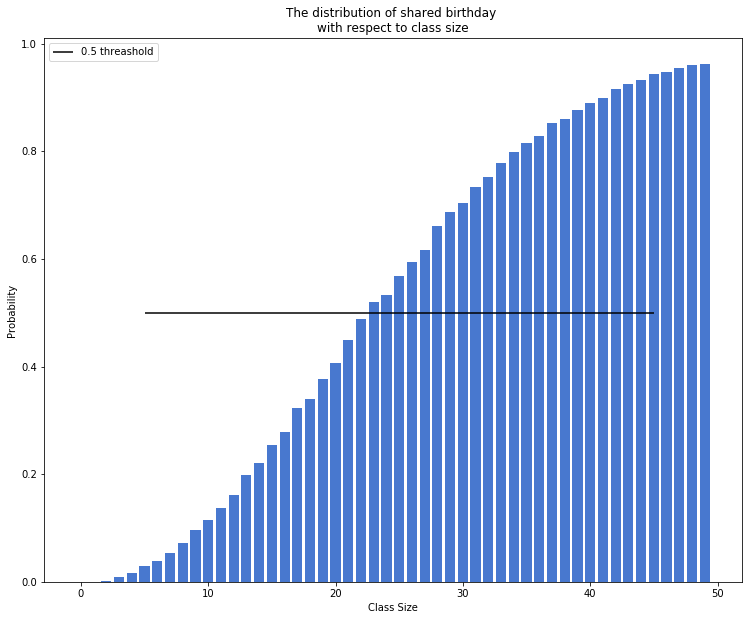

In [31]:
plt.style.use("seaborn-muted")
plt.bar(index[:50],size_result_ls[:50])
plt.hlines(y=0.5,xmin=5,xmax=45,label="0.5 threashold")
plt.xlabel("Class Size")
plt.ylabel("Probability")
plt.title("The distribution of shared birthday \nwith respect to class size")
plt.legend(loc="upper left")

### Question 4:    
One of the question to answer would be:  
  
Given the frequence of breakdown to be constant, how could we restart the service as fast as we can? In another sentence, it is to exmaine how far will be the breakdown point to the nearst station.  
  
To extend this reasoning a bit more, if we define the efficiency to be the total runs a service can perform given the constraint of car broken-down and packing and unpacking riders. One interesting question to ask is that how many runs can a bus perform given the two strategy.

In [32]:
#simulate the breakdown in two cases and check gather the distance.
def break_down_sim(runs=100):
    """
    Given two case of our stretegy, we want to investigate the break-down point's distance.
    param: case = 1 is the current situation. case = 2 is the adding 3 new stations.
    return distance, the distance to the closest station.
    """
    case1_res = []
    case2_res = []
    for i in range(runs):
        break_point = random.randint(0,20)
        # decide for the case 1, we need to compare it with the 10
        case1_bk = int(break_point>10)*(20-break_point)+int(break_point<=10)*(break_point)
        case1_res.append(case1_bk)
        # decide for the case 2.
        case2_bk = break_point % 5
        case2_bk = int(case2_bk>2)*(5-case2_bk)+int(case2_bk<=2)*(case2_bk)
        case2_res.append(case2_bk)
    return case1_res, case2_res

In [33]:
# make a plot on the simulation results with respect the the mean distance to a nearset station.
runs = range(1,10000,100)
c2_mean, c1_mean = [],[]
for i in runs:
    c1,c2 = break_down_sim(i)
    c1_mean.append(np.mean(c1))
    c2_mean.append(np.mean(c2))

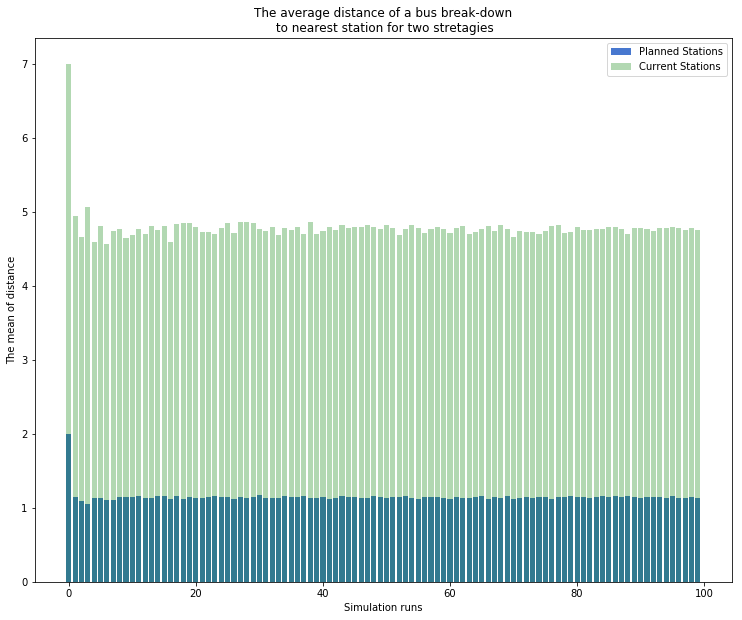

In [34]:
plt.bar(index,c2_mean,alpha=1)
plt.bar(index,c1_mean,alpha=0.3,color="green")
plt.xlabel("Simulation runs")
plt.ylabel("The mean of distance")
plt.title("The average distance of a bus break-down\n to nearest station for two stretagies")
plt.legend(loc="best",labels=["Planned Stations","Current Stations"])

In the simulation for this problem, I run the simulation on a iteration times from 1 to 10000 times by incresing 100 at a time. The graph above shows the average distance from a breakdown point to a station. It is clear that building 3 more stations is way better than the current station's location.